# NFL Draft Factor Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

from sklearn.decomposition import PCA, FactorAnalysis

from factor_analyzer import FactorAnalyzer

from pprint import pprint

In [2]:
data = pd.read_csv("./nfl_draft_clean.csv")

In [3]:
oline = pd.read_csv("./oline_normalized.csv")
wrs = pd.read_csv("./wrs_normalized.csv")
rbs = pd.read_csv("./rbs_normalized.csv")

In [4]:
idx_cols = ['year', 'pos', 'player', 'college', 'team']
measureable_cols = ['height_inches', 'weight', 'forty', 'vertical', 'bench',
                    'broad', 'threecone', 'shuttle']
receiving_cols = ["total_seasons", "total_games", "receiving.total_rec", "receiving.total_plays",
                    "receiving.total_yds", "receiving.total_rec_yds", "receiving.total_tds",
                    "receiving.total_rec_tds", "receiving.recs_per_game",
                    "receiving.yds_per_game", "receiving.tds_per_game", "receiving.yds_per_rec",
                    "receiving.tds_per_rec"]
rushing_cols = ["total_seasons", "total_games", "rushing.total_plays", "rushing.total_atts",
                "rushing.total_yds", "rushing.total_rush_yds", "rushing.total_rec_yds", 
                "rushing.total_tds", "rushing.total_rush_tds", "rushing.total_rec_tds",
                "rushing.total_recs", "rushing.atts_per_game", "rushing.yds_per_game",
                "rushing.rush_yds_per_game", "rushing.rec_yds_per_game", "rushing.tds_per_game",
                "rushing.rush_tds_per_game", "rushing.rec_tds_per_game", "rushing.recs_per_game",
                "rushing.rush_yds_per_att", "rushing.rush_tds_per_att", "rushing.rec_yds_per_rec",
                "rushing.rec_tds_per_rec"]
conf_cols = [x for x in data.columns if x.startswith("conf_")]
team_cols_std = ["win_pct", "wins", "losses", "ppg_off", "ppg_def", "srs", "sos"]
team_cols_no_std = ["ap_rank_score"]
team_cols = team_cols_std + team_cols_no_std + conf_cols
dep_cols = ["pick", "pick_score"]

oline_cols = idx_cols + dep_cols + measureable_cols + team_cols
endog_oline = "pick_score"
exog_oline = measureable_cols + ["ppg_off", "ppg_def", "ap_rank_score", "sos"] + conf_cols
wr_cols = idx_cols + dep_cols + measureable_cols + receiving_cols + team_cols
endog_wrs = "pick_score"
exog_wrs = (measureable_cols +
            ["receiving.total_plays", "receiving.recs_per_game",
             'receiving.tds_per_game', 'receiving.yds_per_rec'] +
            ["ppg_off", "ppg_def", "ap_rank_score", "sos"] +
            conf_cols)
rb_cols = idx_cols + dep_cols + measureable_cols + rushing_cols + team_cols
endog_rbs = "pick_score"
exog_rbs = (measureable_cols +
            ["total_games",
             "rushing.atts_per_game",
             "rushing.recs_per_game",
             #"rushing.rush_tds_per_game", "rushing.rec_tds_per_game",
             "rushing.rush_yds_per_att", "rushing.rush_tds_per_att",
             "rushing.rec_yds_per_rec", "rushing.rec_tds_per_rec"] +
            ["ppg_off", "ppg_def", "ap_rank_score", "sos"] +
            conf_cols)

In [5]:
oline_variables = ["pick_score"] + measureable_cols + team_cols
wrs_variables = ["pick_score"] + measureable_cols + receiving_cols + team_cols
rbs_variables = ["pick_score"] + measureable_cols + rushing_cols + team_cols

### Analysis Functions

In [6]:
def fit_summarize_pca(data, cols, n_components=0.95):
    pca_model = PCA(n_components=n_components)    
    X_transformed = pca_model.fit_transform(data[cols])
    comps = ["c" + str(n) for n in range(1, pca_model.n_components_ + 1)]
    pca_loadings = pd.DataFrame(pca_model.components_, index=comps, columns=cols)
    exp_var_ratios = pd.Series(pca_model.explained_variance_ratio_, index=comps)
    return pca_loadings, exp_var_ratios

In [7]:
def fit_summarize_fa(data, cols, n_factors=11, rotation="varimax"):
    fa_model = FactorAnalyzer(n_factors=n_factors, rotation=rotation)
    fa_model.fit(data[cols])
    factors = ["f" + str(i) for i in range(1, n_factors + 1)]
    
    fa_loadings = pd.DataFrame(fa_model.loadings_, index=cols, columns=factors)
    fa_fvars = pd.DataFrame(fa_model.get_factor_variance(),
                            index=["variance", "prop_variance", "cum_variance"],
                            columns=factors)
    return fa_loadings, fa_fvars

In [8]:
def write_output(pca_exp_var_cumsum, fa_loadings, position):
    evr_df = pca_exp_var_cumsum.rename("Exp. Var. Ratio Cum Sum").reset_index().rename(columns={"index":"Component"})
    evr_df.to_html("{}_pca_exp_var_cumsum.html".format(position), index=False)
    with open("{}_fa_loadings_all.html".format(position), "w") as f:
        f.write(fa_loadings.render())

### Analyze Oline

In [9]:
oline_pca_loadings, oline_exp_var_ratios = fit_summarize_pca(oline, cols=oline_variables)

In [10]:
oline_exp_var_cumsum = oline_exp_var_ratios.cumsum()
oline_exp_var_cumsum

c1     0.304667
c2     0.476877
c3     0.556347
c4     0.626020
c5     0.695115
c6     0.745736
c7     0.792588
c8     0.831746
c9     0.865766
c10    0.892442
c11    0.916827
c12    0.934342
c13    0.946742
c14    0.956494
dtype: float64

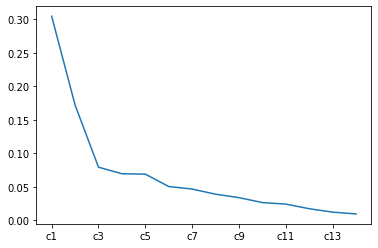

In [11]:
oline_pca_scree_plot = oline_exp_var_ratios.plot()

In [12]:
pca_scree_plot = oline_exp_var_ratios.plot

In [13]:
oline_pca_loadings.T.style.background_gradient("coolwarm")

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
pick_score,-0.060309,-0.207367,0.467327,0.183178,0.117621,-0.092517,-0.418643,0.685034,-0.030020,0.081263,-0.104933,-0.092205,-0.032246,0.046462
height_inches,-0.004244,0.022121,0.569638,-0.506510,0.015273,0.099719,-0.033385,-0.320994,-0.356325,0.368556,-0.127259,0.139574,0.036250,0.045334
weight,-0.097757,0.263214,0.516644,-0.025276,0.097958,-0.105832,-0.118221,-0.265045,0.533710,-0.445465,0.221405,-0.055410,0.053952,-0.077531
forty,-0.076416,0.433053,-0.075008,-0.081048,-0.081574,-0.077420,0.049420,0.105619,0.466588,0.328327,-0.652391,-0.014245,-0.041584,0.023677
vertical,0.044002,-0.362640,0.149296,0.089999,0.114333,0.423930,0.383460,0.051601,0.471798,0.442334,0.260457,-0.018015,-0.028367,-0.069847
bench,0.002762,-0.098374,0.133478,0.638008,0.307471,-0.441499,0.077871,-0.398795,-0.084729,0.254729,-0.136821,0.118172,0.031577,0.056133
broad,0.080088,-0.410992,0.168998,0.019474,0.055549,0.205350,0.340306,-0.049993,-0.043687,-0.504896,-0.604196,-0.065196,0.019925,0.011676
threecone,-0.066994,0.418785,0.126437,0.250688,0.061266,0.300157,0.276852,0.265327,-0.161338,-0.113132,0.042355,0.603402,0.262376,0.030384
shuttle,-0.044966,0.433100,0.151455,0.233338,0.132585,0.254035,0.234814,0.025289,-0.316522,0.022372,0.044297,-0.629498,-0.260898,-0.088194
win_pct,-0.417882,-0.061735,-0.069692,-0.040585,0.133643,0.038055,-0.019005,-0.017562,-0.029208,0.005058,-0.008435,-0.047623,0.247460,-0.027940


In [14]:
oline_fa_loadings, oline_fa_fvars = fit_summarize_fa(oline, cols=oline_variables,
                                                     n_factors=8, rotation="varimax")

In [15]:
oline_fa_fvars

,f1,f2,f3,f4,f5,f6,f7,f8
variance,5.254521,2.188855,1.885248,1.140912,1.140115,1.124017,1.057742,0.948699
prop_variance,0.181190,0.075478,0.065009,0.039342,0.039314,0.038759,0.036474,0.032714
cum_variance,0.181190,0.256668,0.321677,0.361018,0.400333,0.439092,0.475566,0.508280


In [16]:
#fa_scree_plot = oline_fa_evs.plot()

In [17]:
oline_fa_output = oline_fa_loadings.style.background_gradient("coolwarm")
oline_fa_output

,f1,f2,f3,f4,f5,f6,f7,f8
pick_score,0.124213,-0.375530,0.065433,-0.056446,-0.107544,-0.027080,0.202169,0.005797
height_inches,-0.021449,-0.069567,0.007696,0.002387,-0.044086,-0.010765,0.370876,-0.154018
weight,0.112658,0.237073,0.016286,0.037003,0.013075,-0.069226,0.545788,0.034784
forty,0.068243,0.716815,0.006510,0.036187,-0.017788,0.043248,0.146920,0.090995
vertical,-0.015706,-0.606877,-0.028987,0.084924,0.059305,-0.014887,-0.036469,-0.023163
bench,0.009554,-0.200071,-0.013179,-0.045300,-0.002613,0.053062,0.056967,0.101557
broad,-0.088651,-0.725950,0.007622,0.028957,0.073130,0.037566,-0.027201,-0.110410
threecone,0.040363,0.491857,-0.065917,0.009285,0.128598,-0.029054,0.420520,0.369822
shuttle,0.001890,0.499235,-0.130436,0.047690,0.130429,-0.003164,0.474039,0.368489
win_pct,0.994675,0.013796,0.036296,-0.013304,-0.027494,0.001481,0.031503,0.019443


In [18]:
write_output(oline_exp_var_cumsum, oline_fa_output, "oline")

### Analyze WRs

In [19]:
wrs_pca_loadings, wrs_exp_var_ratios = fit_summarize_pca(wrs, cols=wrs_variables, #cols=[endog_wrs] + exog_wrs,
                                                         n_components=0.9)

In [20]:
wrs_exp_var_cumsum = wrs_exp_var_ratios.cumsum()
wrs_exp_var_cumsum

c1     0.246936
c2     0.430913
c3     0.533977
c4     0.609740
c5     0.677979
c6     0.727188
c7     0.766527
c8     0.803012
c9     0.831630
c10    0.858572
c11    0.882502
c12    0.902146
dtype: float64

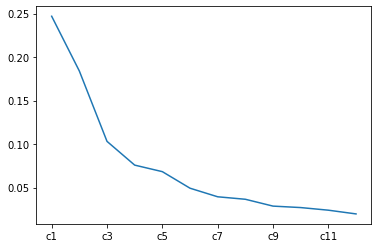

In [21]:
wrs_pca_scree_plot = wrs_exp_var_ratios.plot()

In [22]:
wrs_pca_loadings.T.style.background_gradient("coolwarm")

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12
pick_score,0.082162,-0.121211,0.218507,0.272530,-0.000969,-0.095856,-0.358142,-0.162738,0.112499,-0.338006,0.114726,-0.023520
height_inches,-0.040620,-0.000747,0.157903,-0.104774,-0.486386,-0.311043,0.053531,0.154088,-0.073830,-0.304796,-0.021235,0.034828
weight,-0.044889,0.021822,0.150536,-0.126912,-0.438516,-0.434841,0.041439,0.099753,-0.006912,-0.147860,0.154812,-0.023690
forty,0.030055,0.071861,-0.034997,-0.413587,-0.069023,-0.217975,0.162188,0.261454,-0.006542,0.295094,-0.427444,0.107376
vertical,-0.008851,-0.013070,0.062434,0.478722,-0.079743,-0.089637,0.191441,-0.130312,-0.245228,0.209331,-0.381992,0.044975
bench,-0.029319,0.014649,0.030893,0.158643,-0.087397,-0.381426,0.065318,-0.346059,0.579256,0.463983,0.271934,0.036615
broad,-0.024299,-0.029789,0.111216,0.432867,-0.160894,-0.096465,0.233709,-0.185194,-0.412809,0.053283,-0.103744,-0.082943
threecone,-0.023641,0.042464,0.026410,-0.327953,-0.163028,0.087764,-0.104681,-0.552182,-0.091356,0.223061,-0.214293,0.246599
shuttle,-0.021763,0.014261,0.005419,-0.341439,-0.153238,0.115945,-0.099298,-0.536820,-0.282567,-0.127034,0.124787,-0.295037
total_seasons,0.133162,-0.065054,-0.407711,0.084186,-0.311330,0.122455,-0.021848,0.033374,0.027791,0.025908,0.048685,-0.020557


In [23]:
wrs_fa_loadings, wrs_fa_fvars = fit_summarize_fa(wrs, cols=wrs_variables, #cols=[endog_wrs] + exog_wrs,
                                                 n_factors=9, rotation="varimax")

In [24]:
wrs_fa_fvars

,f1,f2,f3,f4,f5,f6,f7,f8,f9
variance,7.296185,5.504478,2.643373,2.042667,1.919826,1.769662,1.602006,1.007501,0.918265
prop_variance,0.173719,0.131059,0.062937,0.048635,0.045710,0.042135,0.038143,0.023988,0.021863
cum_variance,0.173719,0.304778,0.367715,0.416350,0.462060,0.504195,0.542338,0.566326,0.588190


In [25]:
#fa_scree_plot = wrs_fa_evs.plot()

In [26]:
wrs_fa_output = wrs_fa_loadings.style.background_gradient("coolwarm")
wrs_fa_output

,f1,f2,f3,f4,f5,f6,f7,f8,f9
pick_score,0.299887,0.144289,-0.199590,0.211383,0.225227,0.405427,0.057905,-0.039138,-0.117386
height_inches,-0.049869,-0.008911,0.027951,0.189795,0.046405,-0.087100,0.767450,-0.010930,-0.034379
weight,-0.058916,-0.035687,-0.032242,0.059883,0.060318,-0.112719,0.888656,0.008413,0.023133
forty,0.061068,-0.073397,-0.034133,-0.149987,-0.076419,-0.508442,0.210459,0.047466,0.080751
vertical,-0.030037,-0.047173,0.040146,0.064961,-0.041061,0.681697,0.086565,-0.018534,0.013989
bench,-0.049647,-0.023049,-0.036744,-0.080648,0.009194,0.200309,0.199638,-0.055566,-0.050636
broad,-0.067192,-0.003614,0.026517,0.125201,-0.069411,0.669625,0.213907,0.000049,0.050659
threecone,-0.055638,-0.048360,-0.000767,0.091195,-0.017477,-0.384053,0.107350,-0.028917,-0.053188
shuttle,-0.049314,0.010865,0.024145,0.079334,-0.021427,-0.383523,0.101272,-0.033444,-0.041053
total_seasons,0.324286,0.023201,0.870796,-0.095614,0.005009,0.007795,-0.011487,0.001169,-0.003102


In [27]:
write_output(wrs_exp_var_cumsum, wrs_fa_output, "wrs")

### Analyze RBs

In [28]:
rbs_pca_loadings, rbs_exp_var_ratios = fit_summarize_pca(rbs, cols=rbs_variables, #cols=[endog_rbs] + exog_rbs
                                                         n_components=0.9)

In [29]:
rbs_exp_var_cumsum = rbs_exp_var_ratios.cumsum()
rbs_exp_var_cumsum

c1     0.248570
c2     0.393652
c3     0.501476
c4     0.585316
c5     0.644120
c6     0.696157
c7     0.738346
c8     0.769736
c9     0.796587
c10    0.822348
c11    0.846880
c12    0.868160
c13    0.887504
c14    0.904500
dtype: float64

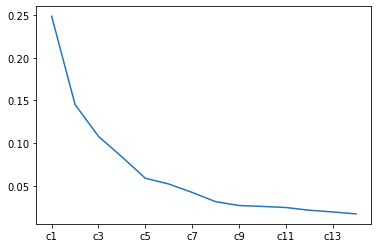

In [30]:
rbs_pca_scree_plot = rbs_exp_var_ratios.plot()

In [31]:
rbs_pca_loadings.T.style.background_gradient("coolwarm")

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
pick_score,0.119806,-0.171590,-0.070168,0.065499,-0.214728,-0.002765,0.248103,-0.002080,-0.022903,-0.305545,-0.037210,0.117513,-0.353801,-0.028826
height_inches,-0.033232,-0.078259,-0.066950,0.010716,0.055843,0.201442,0.505122,-0.081076,0.074392,0.120065,-0.415775,0.082295,-0.166029,0.054815
weight,-0.031648,-0.072475,-0.138673,-0.039340,0.189083,0.161251,0.514625,-0.108159,-0.117503,0.184227,-0.075793,0.189105,-0.065639,0.017627
forty,-0.036789,0.073199,-0.029132,-0.105535,0.422464,-0.026173,0.011212,0.128205,-0.011072,0.312413,-0.152017,0.079996,0.299133,-0.182712
vertical,-0.007068,-0.056980,-0.029622,0.076633,-0.426370,0.065050,0.170338,-0.167546,0.211827,0.182919,0.073602,-0.190448,0.374217,0.090344
bench,0.015525,-0.014775,-0.031322,-0.063970,-0.073789,0.060484,0.252606,-0.103031,-0.421972,0.024465,0.730644,0.255128,0.019595,-0.129512
broad,0.006462,-0.088258,-0.028401,0.098641,-0.438588,0.044670,0.163588,-0.198861,0.306926,-0.012872,-0.008753,-0.105885,0.195717,-0.091150
threecone,-0.047024,0.030412,-0.022577,-0.057791,0.330182,-0.017497,0.142714,-0.100244,0.416102,-0.287367,0.315870,-0.004576,0.294257,0.280472
shuttle,-0.012543,0.029114,-0.000043,-0.023328,0.384208,0.020717,0.148603,-0.195798,0.367941,-0.360021,0.120969,-0.098887,-0.120925,-0.221954
total_seasons,0.046519,0.082929,0.139738,-0.409791,-0.057187,0.261754,-0.035832,-0.067079,-0.013748,0.012412,-0.041499,0.017540,-0.010104,0.028778


In [32]:
rbs_fa_loadings, rbs_fa_fvars = fit_summarize_fa(rbs, cols=rbs_variables, #cols=[endog_rbs] + exog_rbs,
                                               n_factors=9, rotation="varimax")

In [33]:
rbs_fa_fvars

,f1,f2,f3,f4,f5,f6,f7,f8,f9
variance,8.233989,5.507987,4.988929,3.207597,2.175824,1.999266,1.978886,1.977741,1.475118
prop_variance,0.158346,0.105923,0.095941,0.061685,0.041843,0.038447,0.038056,0.038033,0.028368
cum_variance,0.158346,0.264269,0.360210,0.421894,0.463737,0.502184,0.540240,0.578273,0.606641


In [34]:
#fa_scree_plot = rbs_fa_evs.plot()

In [35]:
rbs_fa_output = rbs_fa_loadings.style.background_gradient("coolwarm")
rbs_fa_output

,f1,f2,f3,f4,f5,f6,f7,f8,f9
pick_score,0.349503,0.250816,0.063051,-0.098418,0.138191,0.056681,-0.142774,0.412437,0.249050
height_inches,-0.060608,0.062075,-0.089906,-0.032747,0.012961,0.075261,-0.063436,0.013786,0.603696
weight,0.005650,0.068681,-0.160731,-0.050751,0.035752,-0.036731,-0.026609,-0.215666,0.857428
forty,-0.020353,-0.057670,-0.069522,0.016311,-0.090988,-0.031208,0.032059,-0.626928,0.066112
vertical,-0.043691,0.019179,-0.046791,-0.035607,-0.052117,0.004914,0.044040,0.623217,0.173170
bench,0.054695,0.008289,-0.009783,0.081476,0.004256,-0.047106,-0.029370,0.081920,0.197051
broad,-0.008004,0.070930,-0.028236,-0.072642,-0.043198,0.027374,0.012086,0.707018,0.181692
threecone,-0.082797,-0.010286,-0.047859,-0.026000,-0.057779,-0.058164,0.023372,-0.391711,0.134246
shuttle,-0.040828,-0.025842,0.045312,-0.020736,0.049227,-0.021774,0.035667,-0.430449,0.172497
total_seasons,0.044232,-0.016759,0.063900,0.871391,-0.115617,0.007159,0.079468,-0.063019,0.023314


In [36]:
write_output(rbs_exp_var_cumsum, rbs_fa_output, "rbs")